### Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import string

import matplotlib.pyplot as plt
import seaborn as sns

import ipywidgets
from ipywidgets import interact

plt.rcParams['figure.figsize'] = (15, 5)
#print(plt.style.available)
plt.style.use('fivethirtyeight')

### Reading the dataset

In [2]:
#reading the dataset
dataset = pd.read_csv('drug.csv')

#printing shape of the dataset
print("The shape of the datasetset :", dataset.shape)

The shape of the datasetset : (161297, 7)


In [3]:
#head of the dataset
dataset.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [4]:
#number of unique drugs present in the dataset
print("Number of unique drugs present in the dataset: ", dataset['drugName'].nunique())

#number of unique medical conditions as mentioned in the dataset
print("Number of unique medical conditions present in the dataset: ", dataset['condition'].nunique())

#Time period when the data was collected
print("\nTime period of collection of data:")

#Starting Date
print("Starting date: ", dataset['date'].min())

#Ending date
print("Ending date: ", dataset['date'].max())

Number of unique drugs present in the dataset:  3436
Number of unique medical conditions present in the dataset:  884

Time period of collection of data:
Starting date:  1-Apr-08
Ending date:  9-Sep-17


### Summarizing the datasetset

In [5]:
#fetching rating and useful count of the drugs
dataset[['rating','usefulCount']].describe()

,rating,usefulCount
count,161297.000000,161297.000000
mean,6.994377,28.004755
std,3.272329,36.403742
min,1.000000,0.000000
25%,5.000000,6.000000
50%,8.000000,16.000000
75%,10.000000,36.000000
max,10.000000,1291.000000


In [6]:
#fetching the number and names of the drugs with useful count = 0
print("\nUSELESS DRUG ANALYSIS:\n")

#number of drugs with useful count = 0
print("Number of drugs with no useful count :", dataset[dataset['usefulCount'] == 0].count()[0])

#average rating of drugs with useful count = 0
print("Average rating of drugs with no Useful count : {0:.2f}".format(dataset[dataset['usefulCount'] == 0]['rating'].mean()))

#name of the drug and the medical condition it is associated with (useful count = 0)
print("\nName of the drug and the medical condition they are associated with: \n", 
    dataset[dataset['usefulCount'] == 0][['drugName','condition']].reset_index(drop = True))

#fetching the number and names of the drugs with useful count > 1000
print("\nUSEFUL DRUG ANALYSIS:\n")
print("Number of drugs with 1000+ useful counts :", dataset[dataset['usefulCount'] > 1000].count()[0])
print("Average rating of drugs with 1000+ useful counts :", dataset[dataset['usefulCount'] > 1000]['rating'].mean())
print("\nName of the drug and the medical condition they are associated with: \n\n", 
    dataset[dataset['usefulCount'] > 1000][['drugName','condition']].reset_index(drop = True))


USELESS DRUG ANALYSIS:

Number of drugs with no useful count : 6318
Average rating of drugs with no Useful count : 5.80

Name of the drug and the medical condition they are associated with: 
                      drugName                condition
0                Trimethoprim  Urinary Tract Infection
1                    MoviPrep        Bowel Preparation
2     Ledipasvir / sofosbuvir              Hepatitis C
3                    NuvaRing            Birth Control
4                  Lurasidone            Schizophrenia
...                       ...                      ...
6313                  Myobloc        Cervical Dystonia
6314           Levonorgestrel            Birth Control
6315                Nexplanon            Birth Control
6316                Lorazepam                  Anxiety
6317           Junel 1.5 / 30            Birth Control

[6318 rows x 2 columns]

USEFUL DRUG ANALYSIS:

Number of drugs with 1000+ useful counts : 4
Average rating of drugs with 1000+ useful counts : 10

In [7]:
#summarizing categorical data
dataset[['drugName','condition','review']].describe(include = 'object')

,drugName,condition,review
count,161297,160398,161297
unique,3436,884,112329
top,Levonorgestrel,Birth Control,"""Good"""
freq,3657,28788,33


In [8]:
#checking for null values
dataset.isnull().sum()

uniqueID         0
drugName         0
condition      899
review           0
rating           0
date             0
usefulCount      0
dtype: int64

In [9]:
#deleting all records with null as an entry for medical condition since it is an essential detail for analysis of drugs
dataset = dataset.dropna()

#checking for missing values
dataset.isnull().sum().sum()

0

### Analysing hidden patterns in the Dataset

C:\Users\Shraddha\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Shraddha\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


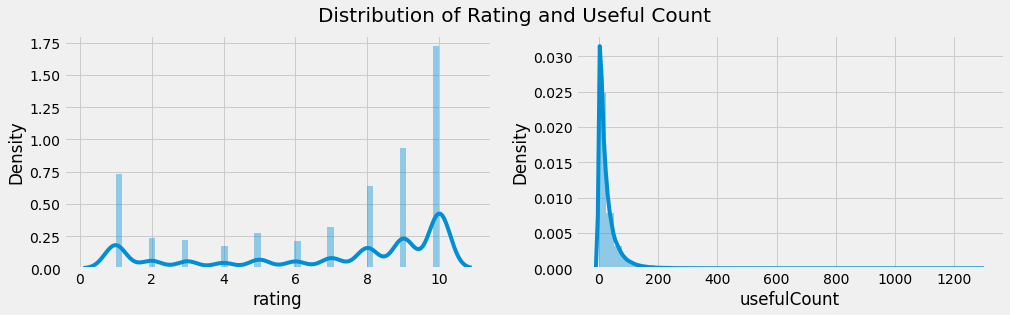

In [10]:
#plotting distribution of rating and useful count

plt.rcParams['figure.figsize'] = (15, 4)

plt.subplot(1, 2, 1)
sns.distplot(dataset['rating'])

plt.subplot(1, 2, 2)
sns.distplot(dataset['usefulCount'])

plt.suptitle('Distribution of Rating and Useful Count \n ', fontsize = 20)
plt.show()

C:\Users\Shraddha\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


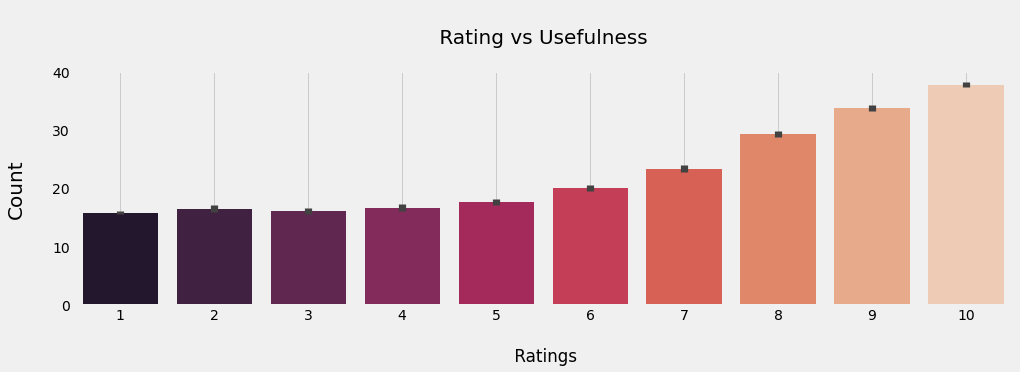

In [11]:
#checking the impact of ratings on usefulness

plt.rcParams['figure.figsize'] = (15, 4)
sns.barplot(dataset['rating'], dataset['usefulCount'], palette = 'rocket')
plt.grid()
plt.xlabel('\n Ratings')
plt.ylabel('Count\n', fontsize = 20)
plt.title('\n Rating vs Usefulness \n', fontsize = 20)
plt.show()

In [12]:
#checking if the length of the review has any impact on ratings of the drugs
dataset['len']  = dataset['review'].apply(len)

In [13]:
#checking the impact of length of reviews on ratings
dataset[['rating','len']].groupby(['rating']).agg(['min','mean','max'])

len                   
       min        mean    max
rating                       
1        5  428.784505   3692
2        9  452.902893  10787
3        8  461.249961   5112
4        7  464.077912   3030
5        6  477.982661   2048
6        4  467.957150   2202
7        6  485.597765   3063
8        3  483.584163   4087
9        3  477.696117   6182
10       3  443.215923   6192

In [14]:
#analysing the longest review
print("Length of Longest Review", dataset['len'].max())
# dataset['review'][dataset['len'] == dataset['len'].max()].iloc[0]

Length of Longest Review 10787


### Cleaning the Reviews

In [15]:
#removing punctuations from the reviews
def punctuation_removal(messy_str):
    clean_list = [char for char in messy_str if char not in string.punctuation]
    clean_str = ''.join(clean_list)
    return clean_str

dataset['review'] = dataset['review'].apply(punctuation_removal)

In [16]:
#removing stopwords from the reviews
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop = stopwords.words('english')
stop.append("i'm")

stop_words = []

for item in stop: 
    new_item = punctuation_removal(item)
    stop_words.append(new_item) 

def stopwords_removal(messy_str):
    messy_str = word_tokenize(messy_str)
    return [word.lower() for word in messy_str 
            if word.lower() not in stop_words ]

dataset['review'] = dataset['review'].apply(stopwords_removal)

In [17]:
#removing numbers from reviews
import re
def drop_numbers(list_text):
    list_text_new = []
    for i in list_text:
        if not re.search('\d', i):
            list_text_new.append(i)
    return ' '.join(list_text_new)

dataset['review'] = dataset['review'].apply(drop_numbers)

### Calculating the Sentiment from Reviews

In [18]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Shraddha\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [19]:
#analysing sentiments from the reviews

from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

train_sentiments = []

for i in dataset['review']:
    train_sentiments.append(sid.polarity_scores(i).get('compound'))
    
train_sentiments = np.asarray(train_sentiments)
dataset['sentiment'] = pd.Series(data=train_sentiments)

In [20]:
#checking the impact of sentiments on the ratings
dataset[['rating','sentiment']].groupby(['rating']).agg(['min','mean','max'])

sentiment                  
             min      mean     max
rating                            
1        -0.9931  0.005311  0.9898
2        -0.9929  0.003867  0.9924
3        -0.9925  0.003170  0.9877
4        -0.9919  0.000697  0.9867
5        -0.9920  0.014445  0.9882
6        -0.9914  0.008838  0.9936
7        -0.9938 -0.000509  0.9911
8        -0.9936  0.008952  0.9923
9        -0.9964  0.009489  0.9911
10       -0.9982  0.005446  0.9923

In [21]:
#sentiment and length of reviews unrelated
#removing irrelevant columns

dataset = dataset.drop(['date','uniqueID','sentiment','review','len'], axis = 1)

#columns in the dataset
dataset.columns

Index(['drugName', 'condition', 'rating', 'usefulCount'], dtype='object')

### Calculating Effectiveness and Usefulness of Drugs

In [22]:
#calculating effective rating

min_rating = dataset['rating'].min()
max_rating = dataset['rating'].max()

def scale_rating(rating):
    rating -= min_rating
    rating = rating/(max_rating -1)
    rating *= 5
    rating = int(round(rating,0))
    
    if(int(rating) == 0 or int(rating)==1 or int(rating)==2):
        return 0
    else:
        return 1
    
dataset['eff_score'] = dataset['rating'].apply(scale_rating)

In [23]:
#calculating usefulness score
dataset['usefulness'] = dataset['rating']*dataset['usefulCount']*dataset['eff_score']

#top 10 useful drugs with the medical conditions they are associated with
dataset[['drugName','condition','usefulness']][dataset['usefulness'] > 
                            dataset['usefulness'].mean()].sort_values(by = 'usefulness', 
                                        ascending = False).head(10).reset_index(drop = True)

,drugName,condition,usefulness
0,Sertraline,Depression,12910
1,Zoloft,Depression,12910
2,Levonorgestrel,Birth Control,12470
3,Mirena,Birth Control,12470
4,Zoloft,Depression,8541
5,Phentermine,Weight Loss,7960
6,Adipex-P,Weight Loss,7960
7,Implanon,Birth Control,7300
8,Viibryd,Depression,6930
9,Vilazodone,Depression,6930


### Analyzing the Medical Condtitions

In [24]:
#calculating number of useless and useful drugs for each medical condition
@interact
def check(condition = list(dataset['condition'].value_counts().index)):
    return dataset[dataset['condition'] == condition]['eff_score'].value_counts()

interactive(children=(Dropdown(description='condition', options=('Birth Control', 'Depression', 'Pain', 'Anxie…

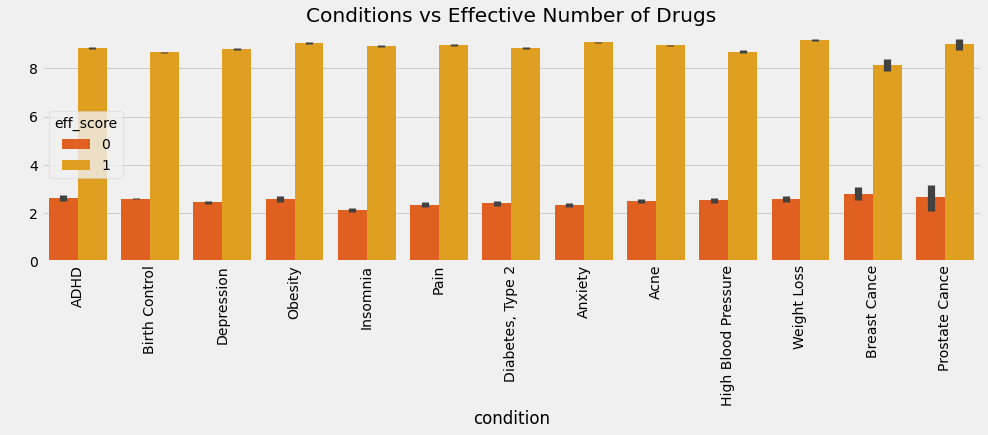

In [25]:
#plotting a graph for the same

popular_conditions = ('Birth Control','Depression','Pain','Anxiety','Acne','Prostate Cance','Insomnia','Weight Loss',
                      'Obesity','ADHD', 'Diabetes, Type 2', 'Breast Cance', 'High Blood Pressure','Migrane')
conditions = dataset.loc[dataset['condition'].isin(popular_conditions)]

sns.barplot(x = conditions['condition'], y = conditions['rating'], hue = dataset['eff_score'], 
     palette = 'autumn')
plt.title('Conditions vs Effective Number of Drugs')
plt.xticks(rotation = 90)
plt.ylabel(' ')
plt.show()

In [26]:
#checking most frequently occuring medical conditions
print("Number of Unique Conditions :", dataset['condition'].nunique())
dataset['condition'].value_counts().head(10)

Number of Unique Conditions : 884


Birth Control      28788
Depression          9069
Pain                6145
Anxiety             5904
Acne                5588
Bipolar Disorde     4224
Insomnia            3673
Weight Loss         3609
Obesity             3568
ADHD                3383
Name: condition, dtype: int64

In [27]:
#checking drugs beneficial for the highest number of people
dataset[['drugName','usefulCount']][dataset['usefulCount'] >
                    dataset['usefulCount'].mean()].sort_values(by = 'usefulCount',
                                        ascending = False).head(10).reset_index(drop = True)

,drugName,usefulCount
0,Zoloft,1291
1,Sertraline,1291
2,Levonorgestrel,1247
3,Mirena,1247
4,Zoloft,949
5,Adipex-P,796
6,Phentermine,796
7,Celexa,771
8,Citalopram,771
9,Implanon,730


### Finding Most Useful and Useless Drugs for each Condition

In [28]:
#removing all duplicates from the dataset
dataset = dataset.drop_duplicates()

In [29]:
#fetching highest and lowest rated drugs for each condition
@interact
def high_low_rate(condition = list(dataset['condition'].value_counts().index)):
    print("\n Top 5 Drugs")
    print(dataset[dataset['condition'] == condition][['drugName','usefulness']].sort_values(by = 'usefulness',
                                                 ascending = False).head().reset_index(drop = True))
    print("\n\n Bottom 5 Drugs")
    print(dataset[dataset['condition'] == condition][['drugName','usefulness']].sort_values(by = 'usefulness',
                                                 ascending = True).head().reset_index(drop = True))

interactive(children=(Dropdown(description='condition', options=('Birth Control', 'Depression', 'Pain', 'Anxie…